## DAY-11 (Task -1)
Use regression, 
Use sklearn.datasets.load_breast_cancer
And Yellowbrick
Show confusion matrix and ROCAUC 
using Logistic regression 

Data Set Url: 
## https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Given Data

#check wdbc.data or check  breast_cancer.csv , but use load_breast_cancer() 
#Diagnosis (M = malignant,1, B = benign,0) 
1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)Ten real-valued features are computed for each cell nucleus:
a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

In [3]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
# from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import * 
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_breast_cancer

In [7]:
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [10]:
data.data.shape

(569, 30)

In [11]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [16]:
data.target_names,data.target.shape

(array(['malignant', 'benign'], dtype='<U9'), (569,))

In [17]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [18]:
X = data.data
y = data.target
X,y

(array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [19]:
#preprocessing - Scaling the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.shape,X

((569, 30),
 array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
          2.75062224,  1.93701461],
        [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
         -0.24388967,  0.28118999],
        [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
          1.152255  ,  0.20139121],
        ...,
        [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
         -1.10454895, -0.31840916],
        [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
          1.91908301,  2.21963528],
        [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
         -0.04813821, -0.75120669]]))

In [20]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=0)
X_train.size,X_test.size

(15360, 1710)

In [22]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
model.coef_,model.intercept_

(array([[-0.36974876, -0.30795751, -0.35602122, -0.4341002 , -0.12560398,
          0.57903403, -0.81627686, -0.87754314, -0.01749327,  0.30146489,
         -1.31742539,  0.21814011, -0.70812483, -0.99035326, -0.25982912,
          0.5968199 ,  0.09963419, -0.28238129,  0.35936747,  0.69549232,
         -1.00226544, -1.26027355, -0.81937394, -0.96560455, -0.61125115,
          0.05894557, -0.86003361, -0.87997291, -0.83878557, -0.48354596]]),
 array([0.12407897]))

In [25]:
features = list(data.feature_names)
type(features)
#  coefficients of each feature w.r.t values
values = list(zip(features,model.coef_[0]))
values

[('mean radius', -0.369748755507417),
 ('mean texture', -0.3079575149746526),
 ('mean perimeter', -0.35602122167357975),
 ('mean area', -0.434100201064278),
 ('mean smoothness', -0.1256039801680417),
 ('mean compactness', 0.5790340299468157),
 ('mean concavity', -0.8162768615236878),
 ('mean concave points', -0.8775431355524077),
 ('mean symmetry', -0.017493274054315867),
 ('mean fractal dimension', 0.30146489374291974),
 ('radius error', -1.3174253902746818),
 ('texture error', 0.21814011174033518),
 ('perimeter error', -0.7081248293319478),
 ('area error', -0.9903532584717113),
 ('smoothness error', -0.2598291158770305),
 ('compactness error', 0.5968199011995069),
 ('concavity error', 0.09963418650350193),
 ('concave points error', -0.28238129482429847),
 ('symmetry error', 0.35936746780494033),
 ('fractal dimension error', 0.6954923181436014),
 ('worst radius', -1.0022654442293122),
 ('worst texture', -1.2602735465517592),
 ('worst perimeter', -0.8193739365027187),
 ('worst area', -

In [26]:
model.score(X_train,y_train)



0.986328125

In [27]:
model.score(X_test,y_test)

1.0

In [30]:
prediction = model.predict(X_train)
confusion_matrix(y_train,prediction)

array([[185,   5],
       [  2, 320]], dtype=int64)

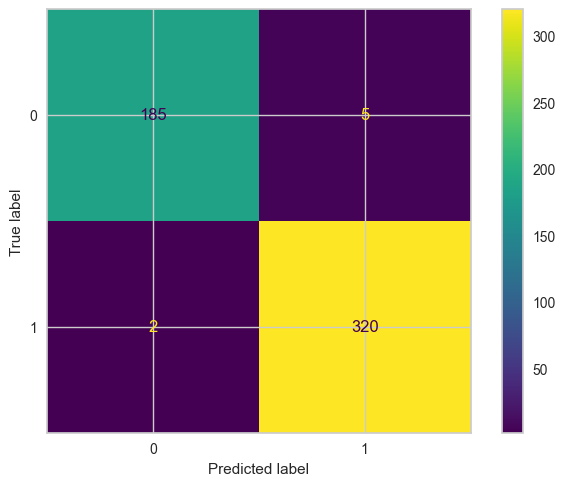

In [35]:
cmatrix = ConfusionMatrixDisplay.from_estimator(model , X_train, y_train)
cmatrix


In [41]:
yHat = model.predict(X_test)
confusion_matrix(y_test,yHat)


array([[22,  0],
       [ 0, 35]], dtype=int64)

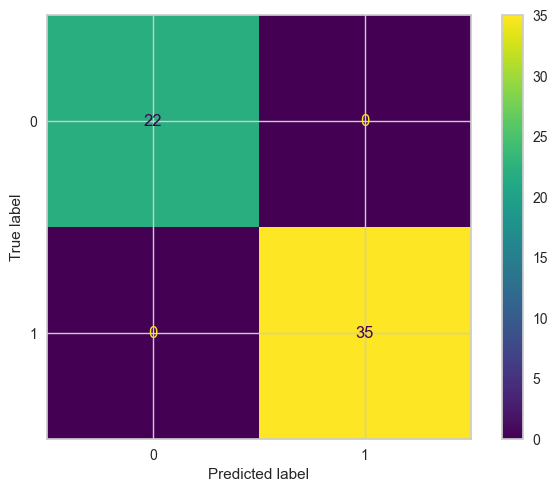

In [42]:
cmatrix_test = ConfusionMatrixDisplay.from_estimator(model , X_test, y_test)
cmatrix_test

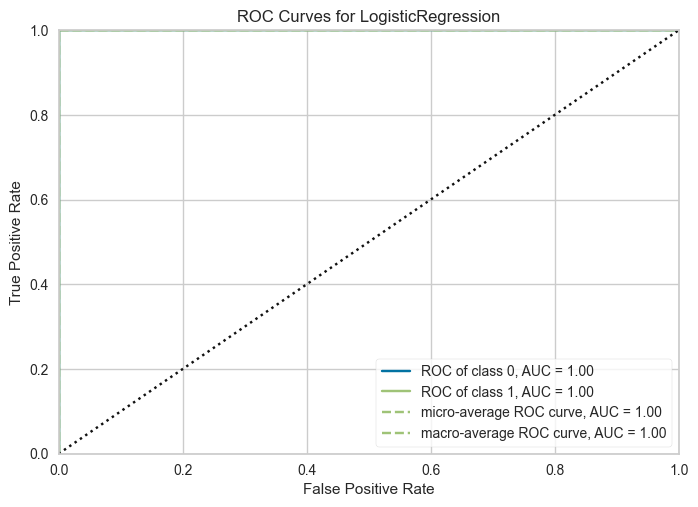

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [48]:
#AUC - Area Under the Curve
curve = ROCAUC(LogisticRegression())
curve.fit(X_train, y_train)
curve.score(X_test, y_test)
curve.show()

In [45]:
curve.show()

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>